<a href="https://colab.research.google.com/github/ballysingh11/pyweather/blob/master/dogbreed_DL_model(image_augumentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
import kaggle

In [ ]:
!mv kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [ ]:
! kaggle competitions download -c dog-breed-identification

 99% 683M/691M [00:06<00:00, 195MB/s]
100% 691M/691M [00:06<00:00, 105MB/s]


In [ ]:
!unzip -q dog-breed-identification.zip

In [ ]:
data = pd.read_csv('labels.csv')

In [ ]:
data.sample(4)

,id,breed
783,137f07bc5f15fa8e39f85a8333e68780,afghan_hound
7143,b33ebbb55eb1b3ff1587deb055529e00,scottish_deerhound
9454,ed142580e8aef16f8bae1e29381d807a,english_setter
1603,278efbcb4eb5c6a22cfa1031cce6136a,weimaraner


In [ ]:
os.listdir('train/')[:10]

['58138a5b78f543290c0c5c59073b8aed.jpg',
 'b02fdd22c35b59fc509d27e1f5d02373.jpg',
 '4a226a3a9a4c748e8e20bcb13c9fd01e.jpg',
 'c8ccf79994355ac29be50dd98eca91b6.jpg',
 '85fde01acabf9dce3f4bb3bc3b5a5f28.jpg',
 'd6978271a12a1019bcb9fb57350b015e.jpg',
 'a7927966a651971484cadea0dc318de6.jpg',
 '933e245251bc667ce6ff74f12dc998fe.jpg',
 '6a6f872fcb352f7d011b654e879778a2.jpg',
 'c78dbf1038e7923b9cf0227890cbc93f.jpg']

In [ ]:
data["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<Axes: >

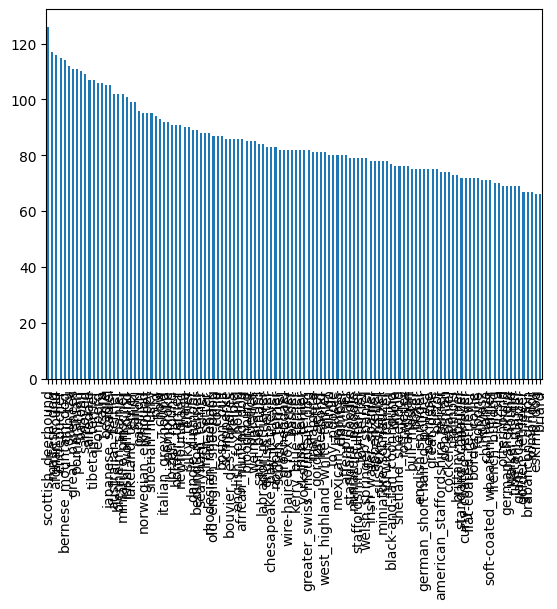

In [ ]:
data["breed"].value_counts().plot.bar()

In [ ]:
data['id'] = data['id'] + '.jpg'

In [ ]:
data.sample(5)

,id,breed
8894,def4b391140f0633501190070ffd81e5.jpg,cardigan
4219,692965e541833d6cf6089b0d416f0c0f.jpg,miniature_schnauzer
7261,b5eaed19ce0231fc6157d6e8ac6239a2.jpg,american_staffordshire_terrier
2321,39d7f3254066edb6df718e503ab41fd4.jpg,briard
3587,5932cef047797c8a0ad22a8fe3e55ce3.jpg,norwegian_elkhound


In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30, width_shift_range=0.3,
                                                height_shift_range=0.1,horizontal_flip=True)

In [ ]:
data.loc[data.id =='bbdd2335f51e0d7f30b0c68fe942e3cb.jpg']

,id,breed
7484,bbdd2335f51e0d7f30b0c68fe942e3cb.jpg,gordon_setter


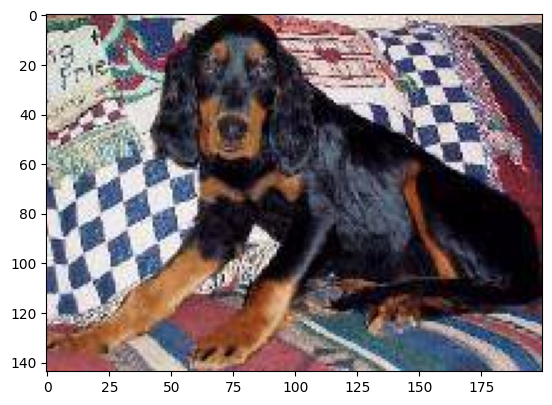

In [ ]:
original_image = cv2.cvtColor(cv2.imread('train/bbdd2335f51e0d7f30b0c68fe942e3cb.jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(original_image)

In [ ]:
original_image.shape

(144, 200, 3)

In [ ]:
image_x = np.expand_dims(original_image, axis= 0)

In [ ]:
image_x.shape

(1, 144, 200, 3)

In [ ]:
idg_flow = idg.flow(x=image_x, y=None, batch_size=1)
idg_flow.next()


array([[[[ 78.775986, 113.97999 ,  98.78599 ],
         [ 83.21102 , 117.67585 , 101.37309 ],
         [ 89.29211 , 120.9602  , 103.82303 ],
         ...,
         [237.5328  , 217.5328  , 216.74594 ],
         [241.78545 , 221.78545 , 222.78545 ],
         [236.21027 , 216.21027 , 217.21027 ]],

        [[ 69.21922 ,  98.31365 ,  86.43844 ],
         [ 72.545494, 106.44455 ,  93.090996],
         [ 76.4957  , 112.07975 ,  97.455826],
         ...,
         [239.38074 , 219.38074 , 219.33304 ],
         [239.56793 , 219.56793 , 220.56793 ],
         [233.32367 , 213.32367 , 214.65822 ]],

        [[ 43.82187 ,  61.297142,  52.21793 ],
         [ 60.822834,  82.73314 ,  72.91476 ],
         [ 67.509   ,  94.13312 ,  83.018005],
         ...,
         [241.22867 , 221.22867 , 221.92014 ],
         [237.35042 , 217.35042 , 218.35042 ],
         [230.36697 , 210.36697 , 212.0711  ]],

        ...,

        [[144.78479 ,  77.84258 ,  66.657036],
         [138.09735 ,  71.66035 ,  55.53372 ]

In [ ]:
aug_index = []
for i in range(9):
  image_x = idg_flow.next()[0]
  image_x = image_x.astype(np.int)
  aug_index.append(image_x)

<ipython-input-21-c096c9bf4671>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image_x = image_x.astype(np.int)


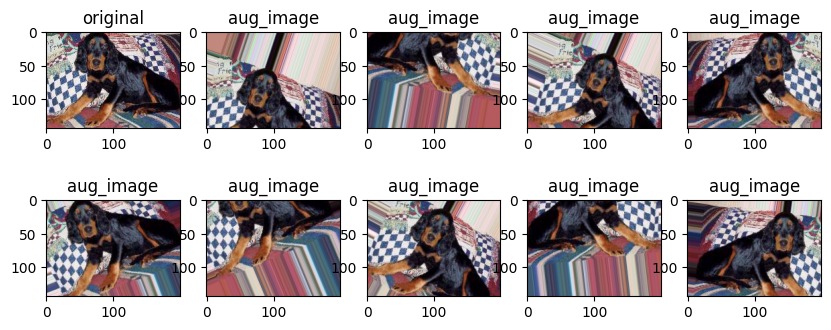

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(2,5,1)
plt.imshow(original_image)
plt.title('original')

for i in range(9):
  plt.subplot(2,5,i+2)
  plt.imshow(aug_index[i])
  plt.title('aug_image')

In [ ]:
# Generate images and save them in directory
image_x.shape



(144, 200, 3)

In [ ]:
image_x = np.expand_dims(original_image,axis=0)

In [ ]:
image_x.shape

(1, 144, 200, 3)

In [ ]:
idg_flow2 = idg.flow(x=image_x, y=None, batch_size=1,save_to_dir='aug_images1')

In [ ]:
os.mkdir('aug_images1')

In [ ]:
idg_flow2.next()

array([[[[197.      , 166.      , 146.      ],
         [197.      , 166.      , 146.      ],
         [197.      , 166.      , 146.      ],
         ...,
         [201.62895 , 239.4193  , 198.98384 ],
         [196.365   , 213.00504 , 181.33669 ],
         [195.80957 , 195.85643 , 174.76172 ]],

        [[197.      , 166.      , 146.      ],
         [197.      , 166.      , 146.      ],
         [197.      , 166.      , 146.      ],
         ...,
         [202.53471 , 235.62729 , 196.4182  ],
         [195.12405 , 206.13928 , 177.5038  ],
         [197.27931 , 193.7676  , 175.79103 ]],

        [[197.      , 166.      , 146.      ],
         [197.      , 166.      , 146.      ],
         [197.      , 166.      , 146.      ],
         ...,
         [200.05327 , 226.52866 , 190.35245 ],
         [195.39977 , 202.00354 , 176.40094 ],
         [201.41505 , 196.24904 , 181.58107 ]],

        ...,

        [[ 59.74999 ,  57.310062,  75.89302 ],
         [ 61.45633 ,  59.3411  ,  83.64707 ]

In [ ]:
idg2 = tf.keras.preprocessing.image.ImageDataGenerator(
     rotation_range=30, width_shift_range = 0.2, height_shift_range = 0.1,
    horizontal_flip= True, validation_split= 0.1, rescale = 1/255.0)

In [ ]:
batch_size = 32

In [ ]:
train_idg = idg2.flow_from_dataframe(data, "train/", "id", "breed",
                                     target_size = (200, 220), batch_size=batch_size, subset="training")

Found 9200 validated image filenames belonging to 120 classes.


In [ ]:
val_idg = idg2.flow_from_dataframe(data, "train/", "id", "breed",
                                     target_size = (200, 220), batch_size=batch_size, subset="validation")

Found 1022 validated image filenames belonging to 120 classes.


In [ ]:
#CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((200,220,3),name = 'input'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), strides=(1,1),activation=tf.keras.activations.relu,padding='valid', name='conv2'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(64,tf.keras.activations.relu, name='dense'))
model.add(tf.keras.layers.Dense(120,tf.keras.activations.softmax, name='output'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2 (Conv2D)              (None, 198, 218, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 109, 32)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 345312)            0         
                                                                 
 dense (Dense)               (None, 64)                22100032  
                                                                 
 output (Dense)              (None, 120)               7800      
                                                                 
Total params: 22,108,728
Trainable params: 22,108,728
Non-trainable params: 0
__________________________________________

In [ ]:
model.compile(tf.keras.optimizers.SGD(),tf.keras.losses.categorical_crossentropy,metrics = ['acc'])

In [ ]:
model.fit(train_idg, batch_size = batch_size, validation_data=val_idg,epochs = 5)

Epoch 1/5
288/288 [==============================] - 332s 1s/step - loss: 4.7897 - acc: 0.0110 - val_loss: 4.7871 - val_acc: 0.0147
Epoch 2/5
 51/288 [====>.........................] - ETA: 4:01 - loss: 4.7869 - acc: 0.0105